In [1]:
import numpy as np
from numpy import array
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
true_news = pd.read_csv("C:\\Users\\jaadt\\Downloads\\True.csv\\True.csv")
false_news = pd.read_csv("C:\\Users\\jaadt\\Downloads\\Fake.csv\\Fake.csv")

In [4]:
false_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
false_news["isTrue"] = 0
true_news["isTrue"] = 1
pl = pd.concat([false_news,true_news],axis = 0)
npl = pl.sample(frac =1, random_state= 42).reset_index(drop =True)
npl.head()

,title,text,subject,date,isTrue
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [6]:
Feed = npl.drop(["subject","date"],axis = 1)
Feed.head()

,title,text,isTrue
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


C:\Users\jaadt\AppData\Local\Temp\ipykernel_10996\3994807826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=Y_train, palette="icefire")


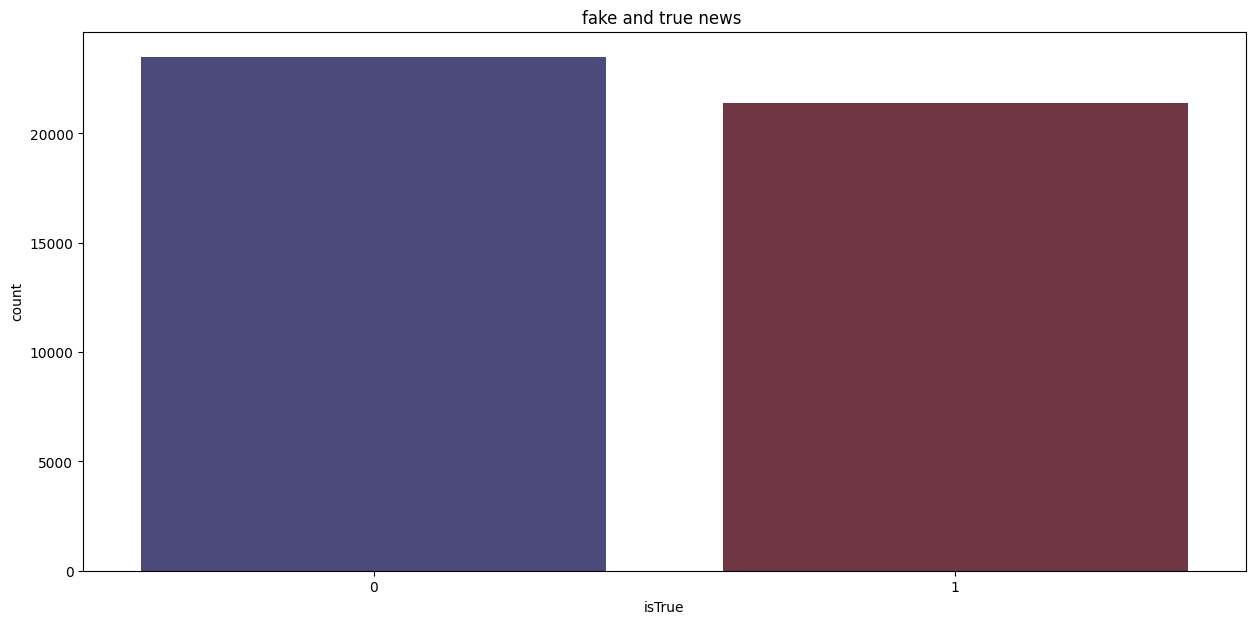

In [7]:
Y_train = Feed["isTrue"]
plt.figure(figsize=(15, 7))
g = sns.countplot(x=Y_train, palette="icefire")
plt.title("fake and true news ")
plt.show()

In [8]:
Feed['mix'] = Feed['title'] + " " + Feed['text']
Feed.drop(['title','text'],axis=1,inplace=True)
Feed.head()
# Randomly select 200 rows from the DataFrame
sampled_feed = Feed.sample(n=500)



In [9]:
corpus = list(sampled_feed['mix'])
labels = array(sampled_feed['isTrue'])
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

In [19]:

all_words = []
for sent in corpus:
    tokenize_word = word_tokenize(sent)  # Tokenize words in each sentence
    for word in tokenize_word:
        if word not in stopwords:  # Ensure 'stopwords' is defined in your code
            all_words.append(word)

unique_words = set(all_words)


vocab_length = len(unique_words) + 5
embedded_sentences = [tf.keras.preprocessing.text.one_hot(sent, vocab_length) for sent in corpus]
padded_sentences = tf.keras.preprocessing.sequence.pad_sequences(embedded_sentences, padding='post')

#Split data
data_train, data_test, labels_train, labels_test = train_test_split(padded_sentences, labels, test_size=0.3)

# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_length, 20, input_length=padded_sentences.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

#Fit model
model.fit(data_train, labels_train, epochs=10, verbose=1)



Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.5169 - loss: 0.7080
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6038 - loss: 0.6843
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7421 - loss: 0.6065
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7173 - loss: 0.5850
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9088 - loss: 0.4319
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 1.0000 - loss: 0.3363
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9928 - loss: 0.2296
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9919 - loss: 0.1602
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 1.0000 - loss: 0.1045
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 1.0000 - loss: 0.0783


In [20]:
loss, accuracy = model.evaluate(data_test, labels_test, verbose=0,batch_size=10)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 98.000002


2.18.0
